In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("Crime_Rate_Dataset.csv")
df.head()

Saving Crime_Rate_Dataset.csv to Crime_Rate_Dataset (1).csv


,Region,Year,Population,Murder,Theft,Assault,Kidnapping,Total_Crimes
0,East,2016,1377326,140,704,497,99,1440
1,South,2020,4966825,39,1909,493,67,2508
2,East,2019,3123302,52,1855,477,48,2432
3,Central,2018,1920353,28,829,110,43,1010
4,West,2024,3334353,55,1644,145,41,1885


In [5]:
df.head()
df.info()
df.describe()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Region        100 non-null    object
 1   Year          100 non-null    int64 
 2   Population    100 non-null    int64 
 3   Murder        100 non-null    int64 
 4   Theft         100 non-null    int64 
 5   Assault       100 non-null    int64 
 6   Kidnapping    100 non-null    int64 
 7   Total_Crimes  100 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 6.4+ KB


,0
Region,0
Year,0
Population,0
Murder,0
Theft,0
Assault,0
Kidnapping,0
Total_Crimes,0


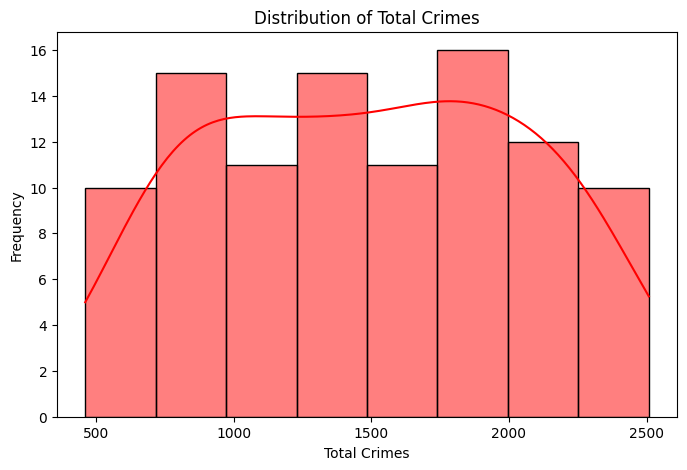

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['Total_Crimes'], kde=True, color='red')
plt.title("Distribution of Total Crimes")
plt.xlabel("Total Crimes")
plt.ylabel("Frequency")
plt.show()

<ipython-input-10-0ec464470288>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Total_Crimes', data=df, estimator='mean', ci=None, palette='viridis')
<ipython-input-10-0ec464470288>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Total_Crimes', data=df, estimator='mean', ci=None, palette='viridis')


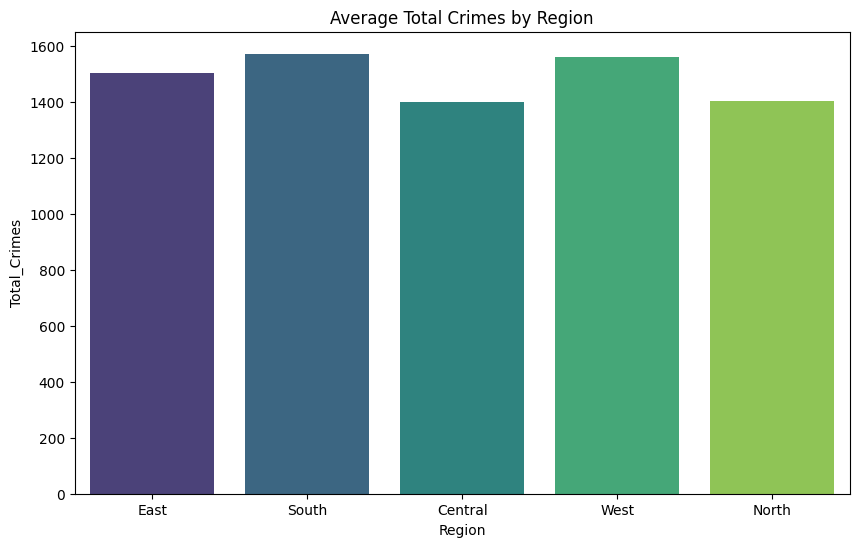

In [10]:
#avg
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Total_Crimes', data=df, estimator='mean', ci=None, palette='viridis')
plt.title("Average Total Crimes by Region")
plt.show()


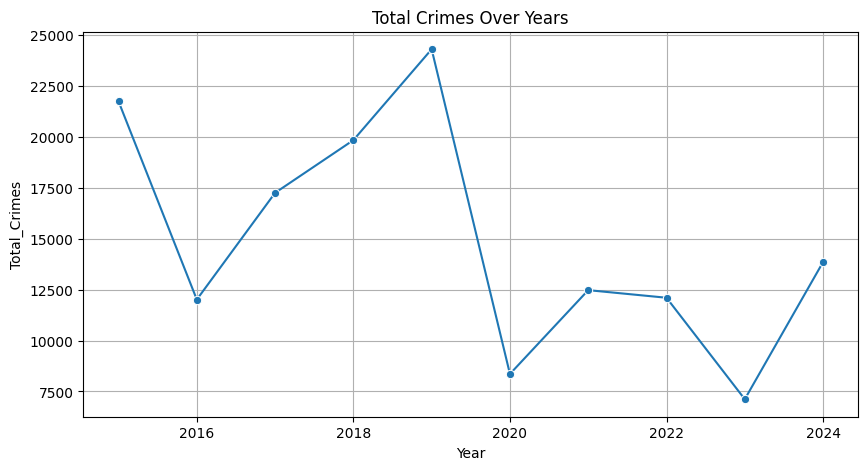

In [12]:
#Total
yearly_crimes = df.groupby('Year')['Total_Crimes'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Total_Crimes', data=yearly_crimes, marker='o')
plt.title("Total Crimes Over Years")
plt.grid(True)
plt.show()

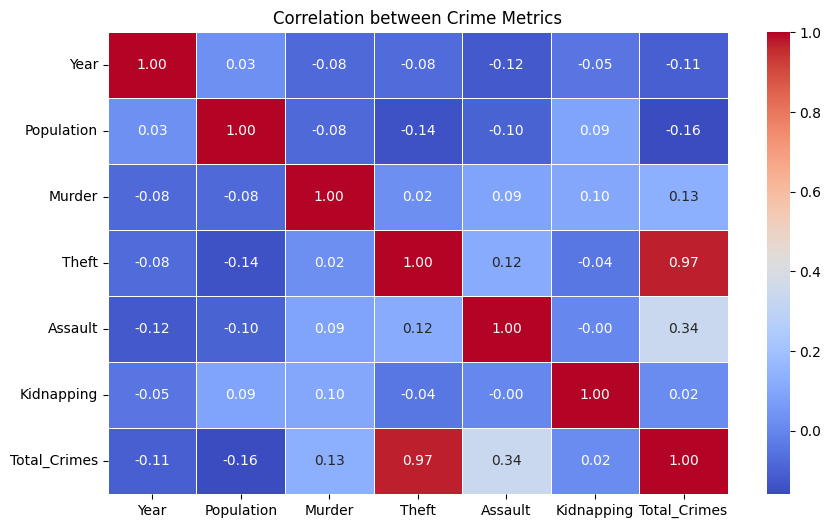

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.drop(columns=["Region"], errors="ignore")

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# title
plt.title("Correlation between Crime Metrics")
plt.show()

In [18]:
import numpy as np

#Binary classification: High Crime (1) & Low Crime (0)
crime_threshold = df["Total_Crimes"].mean()  # Get the average crime count
df["High_Crime"] = np.where(df["Total_Crimes"] > crime_threshold, 1, 0)

# Define X (features) & y (target)
X = df.drop(columns=["Total_Crimes", "High_Crime", "Region"], errors="ignore")
y = df["High_Crime"]


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



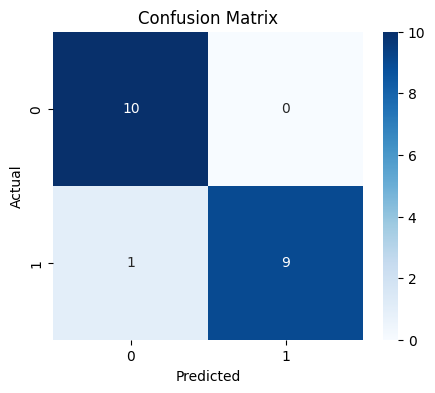

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

